<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing  Road Safety Data

_Author: Dima Galat (Sydney)_

---

For Project 2, you are asked to analyze a dataset collected by UK police forces. The same dataset is published at https://data.gov.uk/dataset/road-accidents-safety-data. This dataset provides detailed information about personal injury accidents on public roads from 2005 to 2016 that were reported to the police. Damage-only accidents with no human casualties aren't included in this data.

This dataset consists of 4 csv data files and an Excel file with variable descriptions. Main data file is called `dftRoadSafety_Accidents_2016` and it provides details of date, time and location, a summary of all reported vehicles and pedestrians involved in road accidents and the total number of casualties, by severity. Details in the casualty and vehicle files can be linked to the relevant accident by the "Accident_Index" field.

This exercise is designed to take you through exploratory data analysis using Pandas. You will be required to understand the dataset and report a variety of observations about the dataset. This task will allow you to practice conducting EDA on a real-world data, and assumes that you are comfortable enough with Python to focus on honing your analysis skills.

---

Please clearly state any assumptions you are making here:
[]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

DATA_PATH = "data/uk-2016-road-safety-data/"
files = !ls $DATA_PATH
pd.read_excel(DATA_PATH + files.grep("xls").s, sheet_name=1, header=2)

Accident Circumstances  \
0                                      Accident Index   
1                                        Police Force   
2                                   Accident Severity   
3                                  Number of Vehicles   
4                                Number of Casualties   
5                                   Date (DD/MM/YYYY)   
6                                         Day of Week   
7                                        Time (HH:MM)   
8           Location Easting OSGR (Null if not known)   
9          Location Northing OSGR (Null if not known)   
10                      Longitude (Null if not known)   
11                       Latitude (Null if not known)   
12                         Local Authority (District)   
13     Local Authority (Highway Authority - ONS code)   
14                                     1st Road Class   
15                                    1st Road Number   
16                                          Road Type   
17                                        Speed limit   
18                                    Junction Detail   
19                                   Junction Control   
20                                     2nd Road Class   
21                                    2nd Road Number   
22                  Pedestrian Crossing-Human Control   
23            Pedestrian Crossing-Physical Facilities   
24                                   Light Conditions   
25                                 Weather Conditions   
26                            Road Surface Conditions   
27                         Special Conditions at Site   
28                                Carriageway Hazards   
29                                Urban or Rural Area   
30        Did Police Officer Attend Scene of Accident   
31  Lower Super Ouput Area of Accident_Location (E...   

                             Vehicle  \
0                     Accident Index   
1                  Vehicle Reference   
2                       Vehicle Type   
3            Towing and Articulation   
4                  Vehicle Manoeuvre   
5   Vehicle Location-Restricted Lane   
6                  Junction Location   
7           Skidding and Overturning   
8          Hit Object in Carriageway   
9        Vehicle Leaving Carriageway   
10        Hit Object off Carriageway   
11               1st Point of Impact   
12       Was Vehicle Left Hand Drive   
13         Journey Purpose of Driver   
14                     Sex of Driver   
15                     Age of Driver   
16                Age Band of Driver   
17                   Engine Capacity   
18           Vehicle Propulsion Code   
19      Age of Vehicle (manufacture)   
20                 Driver IMD Decile   
21             Driver Home Area Type   
22                               NaN   
23                               NaN   
24                               NaN   
25                               NaN   
26                               NaN   
27                               NaN   
28                               NaN   
29                               NaN   
30                               NaN   
31                               NaN   

                                          Casualty  
0                                   Accident Index  
1                                Vehicle Reference  
2                               Casualty Reference  
3                                   Casualty Class  
4                                  Sex of Casualty  
5                                  Age of Casualty  
6                             Age Band of Casualty  
7                                Casualty Severity  
8                              Pedestrian Location  
9                              Pedestrian Movement  
10                                   Car Passenger  
11                          Bus or Coach Passenger  
12  Pedestrian Road Maintenance Worker (From 2011)  
13                                   Casualty Type  
14                             Ca

### Basic level

**Read the main dataset using Pandas.**

In [3]:
# Please use a single code cell for each question answer
print("Main file - ", files[-1])

Main file -  dftRoadSafety_Accidents_2016.csv


**Check the number of rows and columns.**

In [16]:
#main_file = pd.read_csv(DATA_PATH + files[-1],low_memory=False)
main_file = pd.read_csv(DATA_PATH + files[-1], dtype={'LSOA_of_Accident_Location': str})

In [17]:
main_file.shape

(136621, 32)

**Check the data type of each column.**

In [10]:
main_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 32 columns):
Accident_Index                                 136621 non-null object
Location_Easting_OSGR                          136614 non-null float64
Location_Northing_OSGR                         136614 non-null float64
Longitude                                      136614 non-null float64
Latitude                                       136614 non-null float64
Police_Force                                   136621 non-null int64
Accident_Severity                              136621 non-null int64
Number_of_Vehicles                             136621 non-null int64
Number_of_Casualties                           136621 non-null int64
Date                                           136621 non-null object
Day_of_Week                                    136621 non-null int64
Time                                           136619 non-null object
Local_Authority_(District)                     136

**Read the main dataset again, using `dtype={...}` argument to specify data types. See if you can avoid a mixed types warning.**

In [63]:
#main_file = pd.read_csv(DATA_PATH + files[-1],dtype='unicode')
main_file['Number_of_Casualties'].describe()

count    136621.000000
mean          1.327644
std           0.789296
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          58.000000
Name: Number_of_Casualties, dtype: float64

In [18]:
main_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 32 columns):
Accident_Index                                 136621 non-null object
Location_Easting_OSGR                          136614 non-null float64
Location_Northing_OSGR                         136614 non-null float64
Longitude                                      136614 non-null float64
Latitude                                       136614 non-null float64
Police_Force                                   136621 non-null int64
Accident_Severity                              136621 non-null int64
Number_of_Vehicles                             136621 non-null int64
Number_of_Casualties                           136621 non-null int64
Date                                           136621 non-null object
Day_of_Week                                    136621 non-null int64
Time                                           136619 non-null object
Local_Authority_(District)                     136

In [19]:
main_file = pd.read_csv(DATA_PATH + files[-1], keep_default_na=True,dtype={'LSOA_of_Accident_Location': str})

**Read the main dataset again, using an appropriate argument to specify missing data values.**

In [23]:
main_file.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             7
Location_Northing_OSGR                            7
Longitude                                         7
Latitude                                          7
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              2
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                      37
Junction_Detail                                   0
Junction_Con

**Convert `Date` column to datetime.**

In [25]:
main_file['Date'] = pd.to_datetime(main_file.Date)

In [29]:
main_file['Date']

0        2016-01-11
1        2016-01-11
2        2016-01-11
3        2016-01-11
4        2016-01-11
5        2016-01-11
6        2016-01-11
7        2016-01-11
8        2016-01-11
9        2016-01-11
10       2016-01-11
11       2016-01-11
12       2016-01-11
13       2016-01-11
14       2016-01-11
15       2016-01-11
16       2016-01-11
17       2016-01-11
18       2016-01-11
19       2016-01-11
20       2016-01-11
21       2016-01-11
22       2016-01-11
23       2016-01-11
24       2016-01-11
25       2016-01-11
26       2016-01-11
27       2016-01-11
28       2016-01-11
29       2016-01-11
            ...    
136591   2016-07-22
136592   2016-07-22
136593   2016-07-23
136594   2016-07-25
136595   2016-07-29
136596   2016-07-17
136597   2016-05-08
136598   2016-06-08
136599   2016-08-08
136600   2016-07-31
136601   2016-07-31
136602   2016-10-08
136603   2016-12-08
136604   2016-08-16
136605   2016-08-17
136606   2016-08-16
136607   2016-08-31
136608   2016-07-31
136609   2016-09-13


**Create a new column that shows month of a year value for every accident in the main dataset.**

In [33]:
main_file['Month'] = main_file['Date'].dt.to_period('M')

In [34]:
main_file

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2016010000005               519310.0                188730.0   
1       2016010000006               551920.0                174560.0   
2       2016010000008               505930.0                183850.0   
3       2016010000016               527770.0                168930.0   
4       2016010000018               510740.0                177230.0   
5       2016010000019               530840.0                167100.0   
6       2016010000020               527610.0                181430.0   
7       2016010000021               523830.0                189460.0   
8       2016010000023               524640.0                180620.0   
9       2016010000024               540670.0                174700.0   
10      2016010000025               528300.0                188290.0   
11      2016010000028               524180.0                196480.0   
12      2016010000031               535890.0                181160.0   
13      2016010000033               536290.0                166630.0   
14      2016010000035               549000.0                182770.0   
15      2016010000039               523320.0                184260.0   
16      2016010000046               527310.0                179690.0   
17      2016010000047               517500.0                170460.0   
18      2016010000048               516350.0                175710.0   
19      2016010000049               513930.0                176600.0   
20      2016010000050               550290.0                185060.0   
21      2016010000051               531980.0                194470.0   
22      2016010000052               512760.0                172110.0   
23      2016010000053               525750.0                179560.0   
24      2016010000055               532660.0                192580.0   
25      2016010000056               528390.0                177880.0   
26      2016010000058               533900.0                190630.0   
27      2016010000060               543780.0                178950.0   
28      2016010000061               547100.0                188420.0   
29      2016010000064               542830.0                172020.0   
...               ...                    ...                     ...   
136591  2016984124216               325196.0                568988.0   
136592  2016984124316               310395.0                594798.0   
136593  2016984124516               312069.0                584734.0   
136594  2016984124616               313586.0                581932.0   
136595  2016984125116               330581.0                568977.0   
136596  2016984125316               306388.0                608723.0   
136597  2016984125416               304668.0                614153.0   
136598  2016984125516               314312.0                579768.0   
136599  2016984125716               310199.0                592684.0   
136600  2016984125916               308336.0                591860.0   
136601  2016984126016               336951.0                583863.0   
136602  2016984126316               314541.0                579214.0   
136603  2016984126416               326222.0                566975.0   
136604  2016984126716               330592.0                568900.0   
136605  2016984126816               307199.0                595390.0   
136606  2016984126916               307267.0                582399.0   
136607  2016984127816               318703.0                566883.0   
136608  2016984128616               305933.0                611172.0   
136609  2016984128816               317395.0                566381.0   
136610  2016984129716               306142.0                605658.0   
136611  2016984129916               321471.0                567402.0   
136612  2016984130316               319298.0                566583.0   
136613  2016984130516               303721.0                611256.0   
136614  2016984130616               321470.0   

**Create a new column that shows hour of the day (24h format) for every accident in the main dataset.**

In [53]:
main_file.loc[main_file['Time'].isnull(),'Time']

76884    NaN
77115    NaN
Name: Time, dtype: object

In [54]:
main_file['Time'] = main_file['Time'].dropna()

In [60]:
#main_file['New_Time'] = main_file['Time'].dropna().apply(lambda x: x.strftime('%d%m%Y'))
#main_file['Time'].isnull().sum()
#main_file['Time'].dropna().apply(lambda x: x.strftime())
main_file["Time_24hr"] = pd.to_datetime(main_file["Time"],errors="coerce").dt.strftime("%H")
main_file['Time_24hr'].isnull().sum()

0

**Report average number of casualties depending on accident severity.**

In [61]:
main_file[['Accident_Severity', 'Number_of_Casualties']].groupby('Accident_Severity').mean()

Number_of_Casualties
Accident_Severity                      
1                              1.775811
2                              1.401749
3                              1.306711

**Create a stacked barplot by accident severity occurrences in different months.** 

In [73]:
#main_file[['Accident_Severity','Month']].groupby('Month').count()
new_df = main_file.groupby(['Accident_Severity', 'Month'])['Month'].count().unstack('Accident_Severity').fillna(0)
new_df

Accident_Severity    1     2      3
Month                              
2016-01            152  1778   9948
2016-02            130  1540   8668
2016-03            131  1740   8832
2016-04            139  1675   9308
2016-05            142  1892   9430
2016-06            110  1738   9294
2016-07            146  2010   9700
2016-08            154  1905   9706
2016-09            144  1909   9629
2016-10            144  1857   9465
2016-11            140  1941  10241
2016-12            163  1740   8980

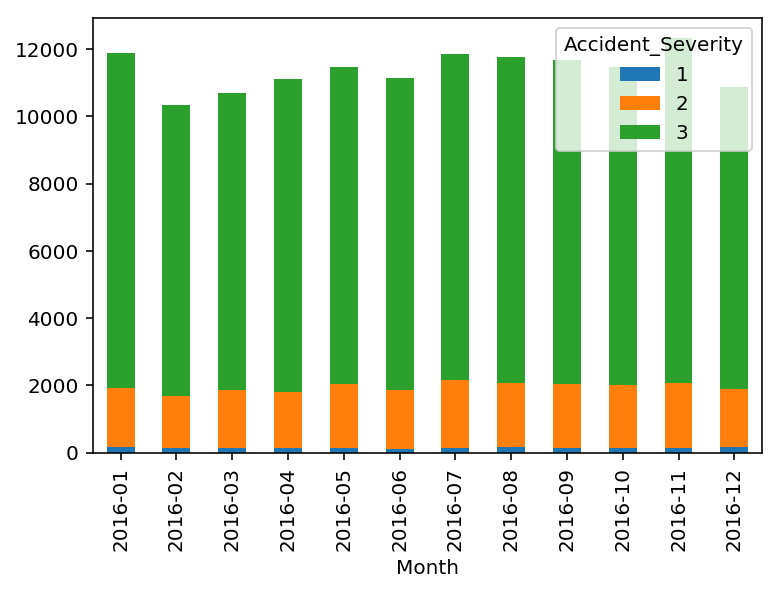

In [75]:
new_df.plot(kind='bar', stacked=True)

**Create a stacked barplot by accident severity occurrences in different months for the last full year of data only.** 

**Create a stacked barplot by accident severity occurrences based on the hour of the day.** 

In [76]:
new_df2 = main_file.groupby(['Accident_Severity', 'Time_24hr'])['Time_24hr'].count().unstack('Accident_Severity').fillna(0)
new_df2

Accident_Severity      1       2        3
Time_24hr                                
00                  50.0   375.0   1530.0
01                  39.0   314.0   1104.0
02                  35.0   228.0    774.0
03                  45.0   197.0    690.0
04                  27.0   166.0    585.0
05                  45.0   255.0    935.0
06                  50.0   529.0   2294.0
07                  72.0   967.0   5259.0
08                  51.0  1295.0   8609.0
09                  66.0   896.0   5632.0
10                  81.0   979.0   5302.0
11                  89.0  1060.0   5797.0
12                  88.0  1139.0   6548.0
13                  97.0  1298.0   6654.0
14                  89.0  1298.0   7031.0
15                  89.0  1597.0   8729.0
16                 112.0  1755.0   9214.0
17                 104.0  1881.0  10083.0
18                 108.0  1577.0   8093.0
19                  88.0  1205.0   5900.0
20                  75.0   879.0   4181.0
21                  71.0   727.0   3315.0
22                  71.0   636.0   2815.0
23                  53.0   472.0   2125.0
NaT                  0.0     0.0      2.0

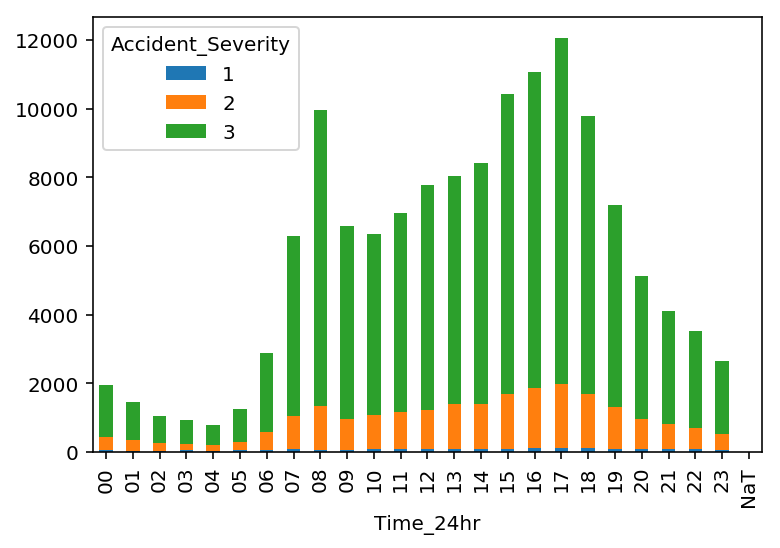

In [77]:
new_df2.plot(kind='bar', stacked=True)

### Intermediate level

**Use appropriate plots for the following relationships:**
- Number of casualties by weather conditions
- Number of casualties by number of vehicles involved
- Number of casualties by hour of the day
- Number of casualties by month

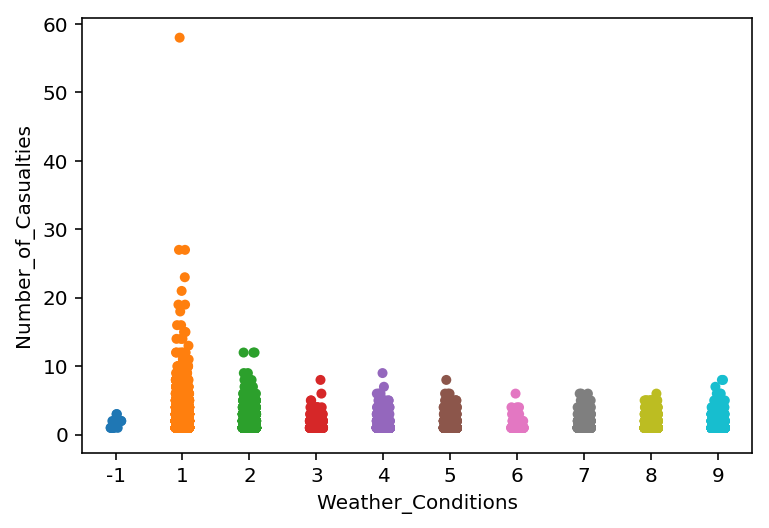

In [82]:
import seaborn as sns
sns.stripplot(x='Weather_Conditions',y='Number_of_Casualties',data=main_file)

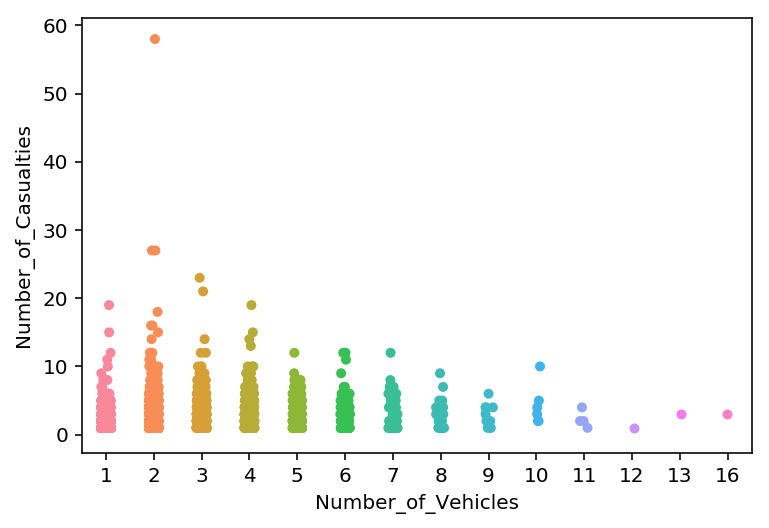

In [83]:
sns.stripplot(x='Number_of_Vehicles',y='Number_of_Casualties',data=main_file)

**Describe a nature of relationship between speed limit and accident severity.**

In [80]:
new_df3 = main_file.groupby(['Accident_Severity', 'Speed_limit'])['Speed_limit'].count().unstack('Accident_Severity').fillna(0)
new_df3

Accident_Severity    1      2      3
Speed_limit                         
20.0                29    994   5726
30.0               571  12205  72220
40.0               165   1887   9398
50.0               123   1032   4533
60.0               592   4211  13580
70.0               215   1393   7710

**Load `Casuality` and `Vehicle` datasets and combine them with your base dataset.**

**Visualise/Describe relationships between:**
- casualty severity
- engine capacity
- driver age
- vehicle age
- hour of the accident
- month of the accident

### Advanced level

**Repeat the last intermediate task using the same 6 features, but consider the relationships for people using cars (excluding minibuses, buses, vans, and goods vehicles), motorcycles (including electric motorcycles), and bicycles separately.**

**Remove outliers that you can identify (if any), and justify your decisions.**

**Using `MakeModel` data, identify 5 vehicle makes (separately for cars and motorcycles) that are most commonly involved in fatal accidents based on this data. Report proportion of accidents for these 10 vehicle makers.**

**What are most dangerous vehicle manoeuvres and why?**

**Which initial point of impact is most dangerous and why?**

**Who are safer drivers: women or men, and why?**

**What is safer in terms of number of fatalities in severe car accidents: rear or front seats, and why?**

### Bonus

**Plot accident locations using Geopandas. User color coding to indicate incident severity.**

**What other interesting relationships can you identify in the dataset?**

**What interesting questions can you ask/answer about/using the dataset?**